In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

##### Fonte:
#### https://www.kaggle.com/code/hbsaakashyadav/remote-work-productivity

In [45]:
# Trazendo dados do arquivo csv como DataFrame
df = pd.read_csv('remote_work_productivity.csv')

In [46]:
# Fazendo algumas limpezas e modificações no df.
def clean(df):
    df.columns=[c.lower() for c in list(df.columns)]
    df.set_index('employee_id', inplace=True)
    df['employment_type'] = df['employment_type'].apply(lambda x: x.lower())
    df.fillna(0, inplace=True)
    df.dropna()

clean(df)
df.head()

,employment_type,hours_worked_per_week,productivity_score,well_being_score
employee_id,,,,
1,remote,29,75,78
2,in-office,45,49,47
3,remote,34,74,89
4,remote,25,81,84
5,remote,50,70,74


In [47]:
# Proporção dos tipos de empregos.
proportion_employment_typec = df['employment_type'].value_counts(normalize=True)
proportion_employment_typec

employment_type
in-office    0.51
remote       0.49
Name: proportion, dtype: float64

In [48]:
# Correlação entre a produtividade e o bem-estar com o modelo de pearson.
corr, pval = pearsonr(df['productivity_score'], df['well_being_score'])
corr, pval

(np.float64(0.13516318219943832), np.float64(1.7981626581203487e-05))

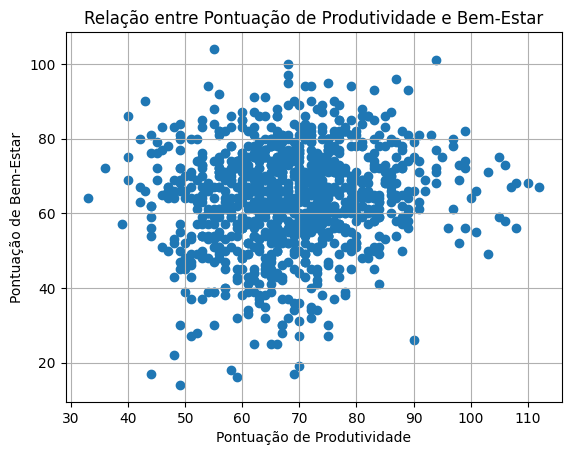

In [49]:
# Criação de grafico de dispersão para conferir a correlação
plt.scatter(df['productivity_score'], df['well_being_score'])

plt.title('Relação entre Pontuação de Produtividade e Bem-Estar')
plt.xlabel('Pontuação de Produtividade')
plt.ylabel('Pontuação de Bem-Estar')
plt.grid()

plt.show()

#### Criando alguns gráficos para melhor compreensão do DF.

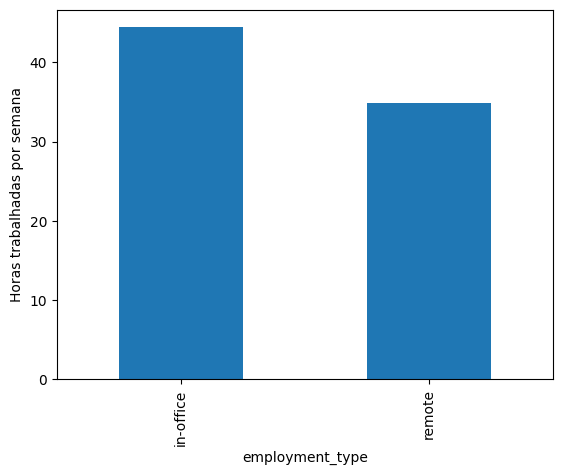

In [50]:
# Quantidade de horas trabalhadas dividido em remote e in-office
hours = df.groupby('employment_type')['hours_worked_per_week'].mean()
hours.plot.bar()
plt.ylabel('Horas trabalhadas por semana')

plt.show()

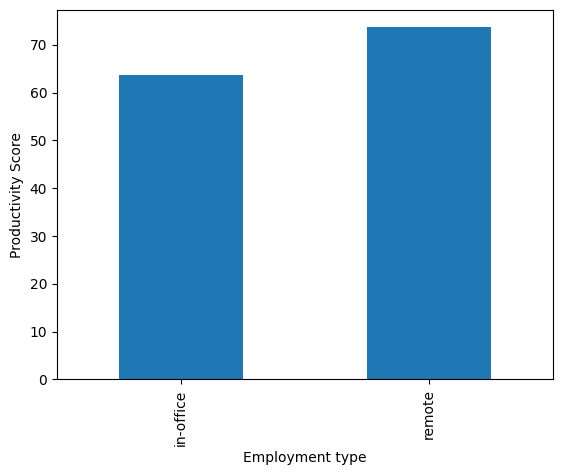

In [51]:
# Produtividade nos dois tipos de trabalhos
productivity = df.groupby('employment_type')['productivity_score'].mean()
productivity.plot.bar()
plt.xlabel('Employment type')
plt.ylabel('Productivity Score')
plt.show()

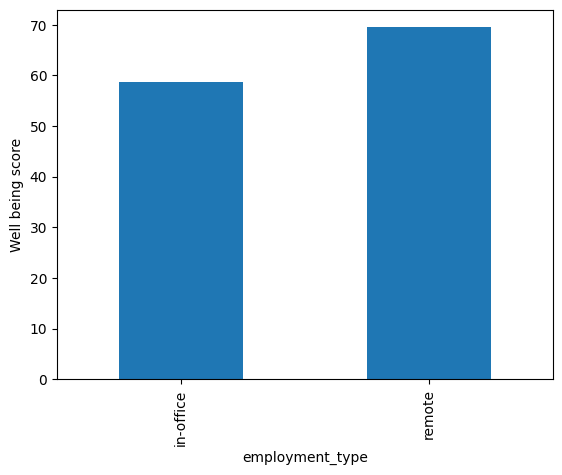

In [52]:
# Bem-Estar nos dois tipos de trabalhos
well_being = df.groupby('employment_type')['well_being_score'].mean()
well_being.plot.bar()
plt.ylabel('Well being score')
plt.show()

### Diferença de médias para Remote e In-Office (ttest)

In [53]:
# Cria dois df separando o original em remote e in-office
remote = df[df['employment_type'] == 'remote'][['productivity_score', 'well_being_score']]
in_office = df[df['employment_type'] == 'in-office'][['productivity_score', 'well_being_score']]

In [54]:
# Diferença entre médias de 'productivity_score' e 'well_being_score' em remote e in-office.
# Hipótese Nula: Não há diferença nas médias.
# Hipótese Alternativa: Há uma diferença entre as medidas.
from scipy.stats import ttest_ind
t_stat, pvalue = ttest_ind(remote, in_office)
print(f'')
t_stat, pvalue

# Média remota é significativa nas duas colunas, HIPÓTESE NULA REJEITADA.

(array([13.90611174, 13.38811374]), array([2.58178621e-40, 1.02991526e-37]))

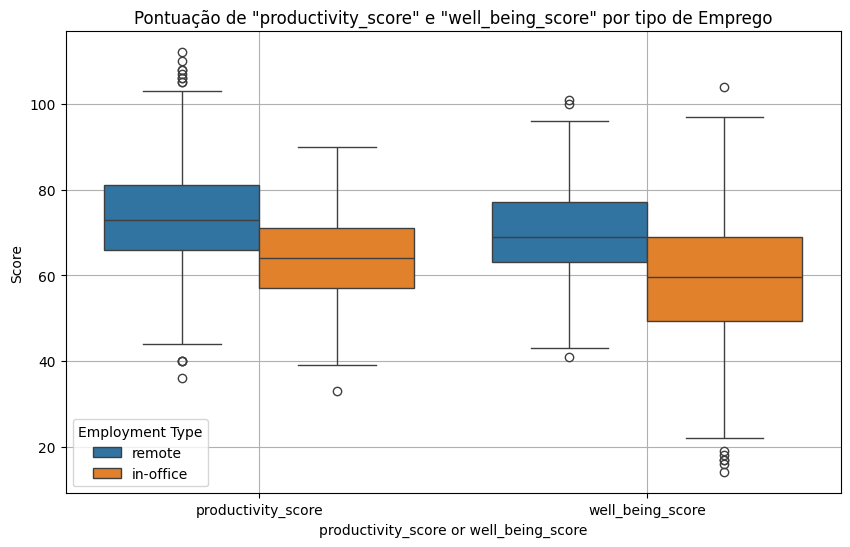

In [55]:
# Representando em grafico e confirmando rejeição da hipótese nula do ttest.
df_melted = df.melt(id_vars='employment_type', value_vars=['productivity_score', 'well_being_score'])

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='variable',
    y='value',
    hue='employment_type',
    data=df_melted
)

plt.title('Pontuação de "productivity_score" e "well_being_score" por tipo de Emprego')
plt.xlabel('productivity_score or well_being_score')
plt.ylabel('Score')
plt.legend(title='Employment Type')
plt.grid(True)

plt.show()



##### Produtividade e Bem-Estar vs. Horas trabalhadas por tipo de emprego.

In [56]:
remote['hours_worked_per_week'] = df.where(df['employment_type'] == 'remote')['hours_worked_per_week']
in_office['hours_worked_per_week'] = df.where(df['employment_type'] == 'in-office')['hours_worked_per_week']


# Média de horas trabalhadas por semana no remote e no in-office.
avg_hours_remote = remote['hours_worked_per_week'].mean()
avg_hours_in_office = in_office['hours_worked_per_week'].mean()
print(avg_hours_remote)
print(avg_hours_in_office)

34.820408163265306
44.42745098039216


In [57]:
# Hipotese Nula: Não há uma correlação significativa
# Hipotese Alternativa: Há uma correlação significativa

corr, pval = pearsonr(remote['productivity_score'], remote['hours_worked_per_week'])
print(f'REMOTE:, corr: {corr}, p-value: {pval}')

corr, pval = pearsonr(remote['productivity_score'], remote['hours_worked_per_week'])
print(f'IN-OFFICE:, corr: {corr}, p-value: {pval}')

REMOTE:, corr: -0.05983084541976498, p-value: 0.1860967745316678
IN-OFFICE:, corr: -0.05983084541976498, p-value: 0.1860967745316678


In [58]:
# Bem-estar e produtividade no trbalho remoto.
print(f'Produtividade no trabalho remoto: {remote['productivity_score'].mean()}, \n Bem-Estar no trabalho remoto: {remote['well_being_score'].mean()}')

Produtividade no trabalho remoto: 73.62857142857143, 
 Bem-Estar no trabalho remoto: 69.4938775510204


In [59]:
# Bem-estar e produtividade trbalho in-office.
print(f'Produtividade trabalho in-office: {in_office['productivity_score'].mean()}, \n Bem-Estar no trabalho in-office: {in_office['well_being_score'].mean()}')


Produtividade trabalho in-office: 63.772549019607844, 
 Bem-Estar no trabalho in-office: 58.67254901960784


<function matplotlib.pyplot.show(close=None, block=None)>

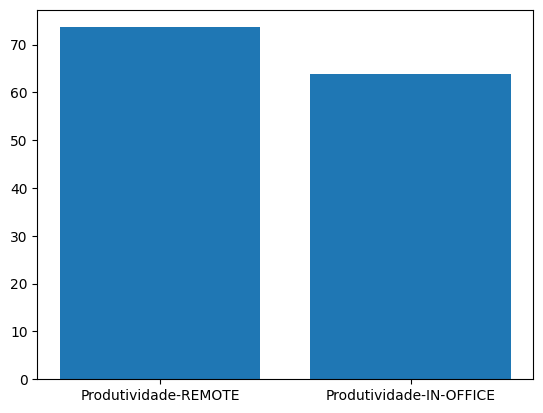

In [60]:

# Organizando os dados para o gráfico

avg_columns1 = remote['productivity_score'].mean()
avg_columns2 = in_office['productivity_score'].mean()

columns = ['Produtividade-REMOTE', 'Produtividade-IN-OFFICE']
avgs = [avg_columns1, avg_columns2]
plt.bar(columns, avgs)

plt.show

### Análisando funcionarios acima da média

In [85]:
# Pegando media de produtividade de remote e in_office.
avg_productivity_remote = remote['productivity_score'].mean()
avg_productivity_in_office = in_office['productivity_score'].mean()
print(avg_productivity_remote)
print(avg_productivity_in_office)

73.62857142857143
63.772549019607844


In [89]:
# Separando apenas funcionarios com produtividade acima da media em ambos os tipo de emprego. 
above_avg_produ_remote = remote[remote['productivity_score'] > avg_productivity_remote][['hours_worked_per_week', 'productivity_score', 'well_being_score']]
above_avg_produ_in_office = in_office[in_office['productivity_score'] > avg_productivity_in_office][['hours_worked_per_week', 'productivity_score', 'well_being_score']]


#### Médias de funcionarios acima da media de produtividade em remote e in-office

In [92]:
above_avg_produ_remote[['hours_worked_per_week', 'productivity_score', 'well_being_score']].mean()

hours_worked_per_week    34.407563
productivity_score       83.533613
well_being_score         69.264706
dtype: float64

In [93]:
above_avg_produ_in_office[['hours_worked_per_week', 'productivity_score', 'well_being_score']].mean()

hours_worked_per_week    44.688462
productivity_score       71.626923
well_being_score         58.569231
dtype: float64

In [91]:
above_avg_produ_in_office.head()

,hours_worked_per_week,productivity_score,well_being_score
employee_id,,,
6,48.0,66,58
15,47.0,76,66
17,58.0,73,68
24,57.0,75,54
26,56.0,66,75


#### Comparando médias do remote e médias do in-office.

In [100]:
average_employee_remote = remote[['hours_worked_per_week', 'productivity_score', 'well_being_score']].mean()
average_employee_remote

hours_worked_per_week    34.820408
productivity_score       73.628571
well_being_score         69.493878
dtype: float64

In [101]:
average_employee_in_office = in_office[['hours_worked_per_week', 'productivity_score', 'well_being_score']].mean()
average_employee_in_office

hours_worked_per_week    44.427451
productivity_score       63.772549
well_being_score         58.672549
dtype: float64

In [112]:
# Porcentagem de horas que in-office tem a mais que o remote
percentage_increase_hours = ((average_employee_in_office['hours_worked_per_week'] - average_employee_remote['hours_worked_per_week']) / average_employee_remote['hours_worked_per_week']) *100
print(f'O trabalho in-office tem {percentage_increase_hours:.2f}% a mais de horas trabalhadas comparado ao remote.')


O trabalho in-office tem 27.59% a mais de horas trabalhadas comparado ao remote.


In [113]:
# Porcentagem de produtividade a mais do remote.
percentage_increase_producticity = ((average_employee_remote['productivity_score'] - average_employee_in_office['productivity_score']) / average_employee_in_office['productivity_score']) *100
print(f'O trabalho remote tem {percentage_increase_producticity:.2f}% a mais de produtividade comparado ao in-office')


O trabalho remote tem 15.45% a mais de produtividade comparado ao in-office


In [114]:
# Porcentagem de produtividade a mais do remote.
percentage_increase_well_being = ((average_employee_remote['well_being_score'] - average_employee_in_office['well_being_score']) / average_employee_in_office['well_being_score']) *100
print(f'Há {percentage_increase_well_being:.2f}% a mais de bem-estar no remote, quando comparado ao in-office;')


Há 18.44% a mais de bem-estar no remote, quando comparado ao in-office;
